In [252]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import KNNImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn import tree
import pydotplus
from IPython.display import Image
from IPython.display import display
import matplotlib.pyplot as plt

In [ ]:
#try decision tree regressor

In [137]:
# Load data
housing_data = pd.read_csv('../data/raw_data/ames_housing_data.csv')
income_unemp_data = pd.read_csv('../data/raw_data/income_unemp_data.csv')
walk_bike_score_data = pd.read_csv('../data/raw_data/walk_bike_score_data.csv')
school_quality_data = pd.read_csv('../data/raw_data/school_quality_data.csv')
crime_data = pd.read_csv('../data/raw_data/ames_crime.csv')

In [139]:
# Merge datasets
data = housing_data.merge(income_unemp_data, how='left', on='Neighborhood')
data = data.merge(walk_bike_score_data, how='left', on='Neighborhood')
data = data.merge(school_quality_data, how='left', on='Neighborhood')
data = data.merge(crime_data, how='left', on='Neighborhood')

In [140]:
# Drop unecessary variables
data.drop(['Id', 'Neighborhood'], axis=1, inplace=True)

In [141]:
# Count missing values
pd.set_option('display.max_rows', 500)
data.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBa

In [142]:
#Impute categorical variables where NAs represent absence of a house feature
data['Alley'].fillna('No alley access', inplace=True)
data['BsmtQual'].fillna('No Basement', inplace=True)
data['BsmtCond'].fillna('No Basement', inplace=True)
data['BsmtExposure'].fillna('No Basement', inplace=True)
data['BsmtFinType1'].fillna('No Basement', inplace=True)
data['BsmtFinType2'].fillna('No Basement', inplace=True)
data['FireplaceQu'].fillna('No Fireplace', inplace=True)
data['GarageType'].fillna('No Garage', inplace=True)
data['GarageYrBlt'].fillna('No Garage', inplace=True)
data['GarageFinish'].fillna('No Garage', inplace=True)
data['GarageQual'].fillna('No Garage', inplace=True)
data['GarageCond'].fillna('No Garage', inplace=True)
data['PoolQC'].fillna('No Pool', inplace=True)
data['Fence'].fillna('No Fence', inplace=True)
data['MiscFeature'].fillna('None', inplace=True)

In [262]:
train, test = train_test_split(data, test_size=0.2, random_state=0)

In [263]:
pd.set_option('mode.chained_assignment', None)
train['MasVnrType']= train.MasVnrType.map({"BrkCmn":1, "BrkFace":2, "CBlock":3, "Stone":4, "None":5, })
train['Electrical'] =train.Electrical.map({"SBrkr":1, "FuseA":2, "FuseF":3, "FuseP":4, "Mix":5, })
test['MasVnrType']= test.MasVnrType.map({"BrkCmn":1, "BrkFace":2, "CBlock":3, "Stone":4, "None":5, })
test['Electrical'] =test.Electrical.map({"SBrkr":1, "FuseA":2, "FuseF":3, "FuseP":4, "Mix":5, })

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', \
                         metric='nan_euclidean', copy=False, add_indicator=False)

train.loc[:,['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'BikeScore']] = \
    knn_imputer.fit_transform(train.loc[:,['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'BikeScore']])
test.loc[:,['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'BikeScore']] = \
    knn_imputer.transform(test.loc[:,['LotFrontage', 'MasVnrType', 'MasVnrArea', 'Electrical', 'BikeScore']])

train['MasVnrType']= round(train['MasVnrType'])
train['Electrical']= round(train['Electrical'])
test['MasVnrType']= round(test['MasVnrType'])
test['Electrical']= round(test['Electrical'])


train['MasVnrType']= train.MasVnrType.map({1:"BrkCmn", 2:"BrkFace", 3:"CBlock", 4:"Stone", 5:"None", })
train['Electrical'] = train.Electrical.map({1:"SBrkr", 2:"FuseA", 3:"FuseF", 4:"FuseP", 5:"Mix", })   

test['MasVnrType']= test.MasVnrType.map({1:"BrkCmn", 2:"BrkFace", 3:"CBlock", 4:"Stone", 5:"None", })
test['Electrical'] = test.Electrical.map({1:"SBrkr", 2:"FuseA", 3:"FuseF", 4:"FuseP", 5:"Mix", })

In [264]:
#Sanity check for KNN Imputation
train.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [265]:
# Encode categorical variables as binary variables

categorical_vars = ['MSSubClass', 'MSZoning','Street','Alley', 'LotShape', 'LandContour', 'Utilities', \
                         'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',\
                         'RoofMatl','Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', \
                         'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1','BsmtFinType2', \
                         'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', \
                         'FireplaceQu','GarageType', 'GarageYrBlt',  'GarageFinish', 'GarageQual', 'GarageCond',\
                         'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition'
                        ]

for var in categorical_vars:
    train = pd.get_dummies(train, columns=[var])
    test = pd.get_dummies(test, columns=[var])

#Dropping columns from test not in train
test = test[train.columns & test.columns]

#Adding column of zeros in test for columns in train but not in test
missing_col = [col for col in train.columns if col not in test.columns]
test[missing_col] = 0

In [190]:
train['SalePrice'].describe()
#Since we have a positively skewed distribution, we are going to categorize sale prices below median as low, 
#between median and 75th percentile as medium and above 75th percentile as high. 
train['SalePriceLvl'] = 0
train['SalePriceLvl'][train['SalePrice'] < data['SalePrice'].median()] = 'Low'
train['SalePriceLvl'][(train['SalePrice'] >= data['SalePrice'].median()) & (train['SalePrice'] < train['SalePrice'].quantile(.75))] = 'Medium'
train['SalePriceLvl'][train['SalePrice'] >= data['SalePrice'].quantile(.75)] = 'High'


test['SalePriceLvl'] = 0
test['SalePriceLvl'][test['SalePrice'] < data['SalePrice'].median()] = 'Low'
test['SalePriceLvl'][(test['SalePrice'] >= data['SalePrice'].median()) & (test['SalePrice'] < test['SalePrice'].quantile(.75))] = 'Medium'
test['SalePriceLvl'][test['SalePrice'] >= data['SalePrice'].quantile(.75)] = 'High'


In [266]:
#Creating target variable for Decision Tree from Sale Price
train['SalePriceAbvMean'] = 0
train['SalePriceAbvMean'] = (train['SalePrice'] >= data['SalePrice'].mean()).astype('int')
test['SalePriceAbvMean'] = 0
test['SalePriceAbvMean'] = (test['SalePrice'] >= data['SalePrice'].mean()).astype('int')

In [267]:
train.drop(['SalePrice'], axis=1, inplace=True)
test.drop(['SalePrice'], axis=1, inplace=True)

In [268]:
train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePriceAbvMean
618,90.0,11694,9,5,2007,2007,452.0,48,0,1774,...,1,0,0,0,0,0,0,0,1,1
870,60.0,6600,5,5,1962,1962,0.0,0,0,894,...,0,0,1,0,0,0,0,1,0,0
92,80.0,13360,5,7,1921,2006,0.0,713,0,163,...,0,0,1,0,0,0,0,1,0,0
817,83.0,13265,8,5,2002,2002,148.0,1218,0,350,...,0,0,1,0,0,0,0,1,0,1
302,118.0,13704,7,5,2001,2002,150.0,0,0,1541,...,0,0,1,0,0,0,0,1,0,1


In [270]:
features = train.drop(columns=['SalePriceAbvMean'])
target = train['SalePriceAbvMean']
features_test = test.drop(columns=['SalePriceAbvMean'])
target_test = test['SalePriceAbvMean']


# features = train.drop(columns=['SalePriceLvl'])
# target = train['SalePriceLvl']
# features_test = test.drop(columns=['SalePriceLvl'])
# target_test = test['SalePriceLvl']

dt = DecisionTreeClassifier(random_state=0)



params = {
          'criterion': ['gini','entropy'],
          'max_depth': (1,3,5,10),
    'min_samples_split': (2, 5, 10)
         }

scorer = {}
scorer['accuracy'] = sklearn.metrics.make_scorer(sklearn.metrics.accuracy_score)
scorer['precision'] = sklearn.metrics.make_scorer(sklearn.metrics.precision_score, average = 'weighted')
scorer['recall'] = sklearn.metrics.make_scorer(sklearn.metrics.recall_score, average = 'weighted')

scoring = ['accuracy', 'precision', 'recall']
k = 10
grid_model = GridSearchCV(estimator=dt, 
                          param_grid=params, 
                          cv=k,
                          scoring=scoring,
                         refit = 'accuracy')

grid_model.fit(features,target)

results = pd.DataFrame(grid_model.cv_results_)
results = results.loc[:,['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']]
results.set_index('params', inplace=True)
results



,mean_test_accuracy,mean_test_precision,mean_test_recall
params,,,
"{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2}",0.852697,0.813907,0.795000
"{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 5}",0.852697,0.813907,0.795000
"{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 10}",0.852697,0.813907,0.795000
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2}",0.888653,0.839967,0.876364
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5}",0.888653,0.839967,0.876364
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 10}",0.888653,0.839967,0.876364
"{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}",0.886074,0.852378,0.851364
"{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}",0.882648,0.851551,0.842374
"{'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 10}",0.882648,0.849357,0.844596


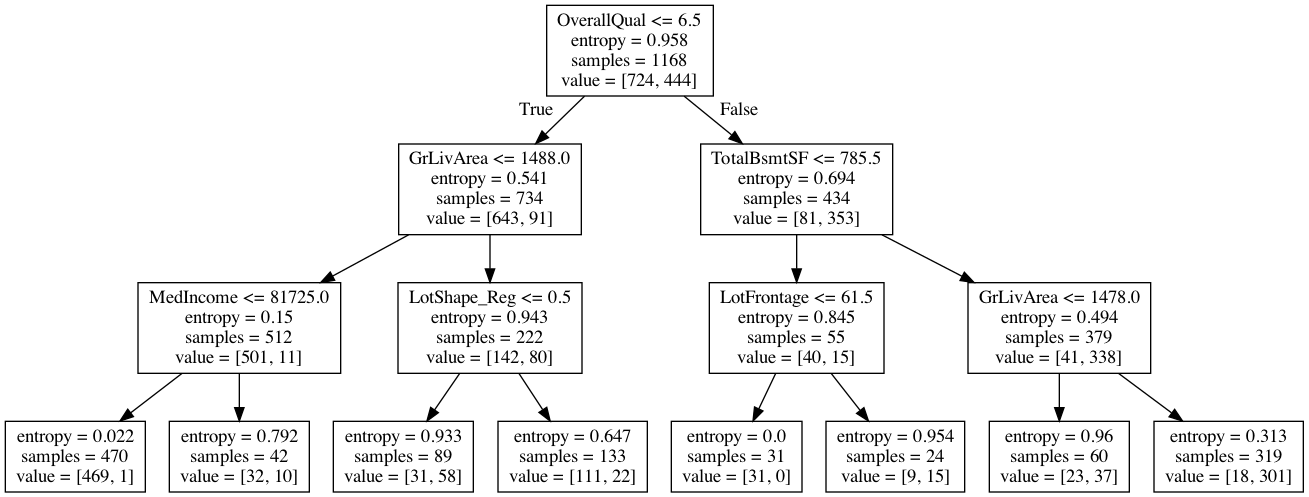

In [271]:
# images = []
# for params_set in grid_model.cv_results_['params']:
    
#     dt_model = DecisionTreeClassifier(random_state=0)
#     dt_model.set_params(**params_set, random_state = 0)
#     dt_model = dt_model.fit(features,target)

#     labels = features.columns.values
#     dot_data = tree.export_graphviz(dt_model, out_file=None, feature_names=labels)

#     img = Image(pydotplus.graph_from_dot_data(dot_data).create_png())
#     images.append(img)
    

# for image in images:
#     display(image)

dt_best = DecisionTreeClassifier(random_state=0)
best_params = grid_model.best_params_
dt_best.set_params(**best_params, random_state = 0)


best_model = dt_best.fit(features,target)

labels = features.columns.values
dot_data = tree.export_graphviz(best_model, out_file=None, feature_names=labels)

graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [272]:
target_pred = dt_best.predict(features_test)
# print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}".format(metrics.accuracy_score(target_test.astype('str'), target_pred.astype('str')),
#                                                                            metrics.precision_score(target_test.astype('str'), target_pred.astype('str'), average='weighted'),
#                                                                            metrics.recall_score(target_test.astype('str'), target_pred.astype('str'), average='weighted'),
#                                                                            metrics.f1_score(target_test.astype('str'), target_pred.astype('str'), average='weighted')
#                                                                           ))

print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}".format(metrics.accuracy_score(target_test, target_pred),
                                                                           metrics.precision_score(target_test, target_pred),
                                                                           metrics.recall_score(target_test, target_pred),
                                                                           metrics.f1_score(target_test, target_pred,)
                                                                          ))



Accuracy:	0.8664383561643836
Precision:	0.8130081300813008
Recall:		0.8620689655172413
F1 Score:	0.8368200836820082


In [ ]:
# Accuracy:	0.8664383561643836     78%
# Precision:	0.8130081300813008
# Recall:		0.8620689655172413
# F1 Score:	0.8368200836820082

#Metrics with target variable SalePriceAbvMean

In [273]:
rf = RandomForestClassifier(random_state=0, 
                            n_jobs=-1,
                            class_weight='balanced'
                           )


params = {
           'criterion': ['gini','entropy'],
          'n_estimators': (100, 200),
          'max_depth': (1,3,5),
         'min_samples_split': (2, 5, 10)
         }
scorer = {}
scorer['accuracy'] = sklearn.metrics.make_scorer(sklearn.metrics.accuracy_score)
scorer['precision'] = sklearn.metrics.make_scorer(sklearn.metrics.precision_score, average = 'weighted')
scorer['recall'] = sklearn.metrics.make_scorer(sklearn.metrics.recall_score, average = 'weighted')
k = 10
grid_rf = GridSearchCV(estimator=rf, 
                          param_grid=params, 
                          cv=k,
                          scoring= scoring,
                         refit = 'accuracy')


grid_rf.fit(features,target)


results_rf = pd.DataFrame(grid_rf.cv_results_)
results_rf = results_rf.loc[:,['params', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall']]
results_rf.set_index('params', inplace=True)
results_rf

,mean_test_accuracy,mean_test_precision,mean_test_recall
params,,,
"{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 100}",0.861200,0.805111,0.841970
"{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 200}",0.880077,0.819531,0.882727
"{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 5, 'n_estimators': 100}",0.861200,0.805111,0.841970
"{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 5, 'n_estimators': 200}",0.880077,0.819531,0.882727
"{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 10, 'n_estimators': 100}",0.861200,0.805111,0.841970
"{'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 10, 'n_estimators': 200}",0.880077,0.819531,0.882727
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}",0.893759,0.844562,0.887273
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 200}",0.898902,0.849558,0.896313
"{'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 100}",0.892897,0.843856,0.885000


In [274]:
rf_best = rf = RandomForestClassifier(random_state=0, 
                            n_jobs=-1,
                            class_weight='balanced'
                           )
best_params_rf = grid_rf.best_params_
rf_best.set_params(**best_params_rf, random_state = 0)


rf_best.fit(features,target)



target_pred_rf = rf_best.predict(features_test)
print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}".format(metrics.accuracy_score(target_test, target_pred_rf),
                                                                           metrics.precision_score(target_test, target_pred_rf),
                                                                           metrics.recall_score(target_test, target_pred_rf),
                                                                           metrics.f1_score(target_test, target_pred_rf)
                                                                          ))

# print("Accuracy:\t{}\nPrecision:\t{}\nRecall:\t\t{}\nF1 Score:\t{}".format(metrics.accuracy_score(target_test.astype('str'), target_pred.astype('str')),
#                                                                            metrics.precision_score(target_test.astype('str'), target_pred.astype('str'), average='weighted'),
#                                                                            metrics.recall_score(target_test.astype('str'), target_pred.astype('str'), average='weighted'),
#                                                                            metrics.f1_score(target_test.astype('str'), target_pred.astype('str'), average='weighted')
#                                                                           ))


Accuracy:	0.910958904109589
Precision:	0.8813559322033898
Recall:		0.896551724137931
F1 Score:	0.888888888888889


In [ ]:
# Accuracy:	0.7876712328767124
# Precision:	0.7604912696544772
# Recall:		0.7876712328767124
# F1 Score:	0.7710183121352019

#salePriceLvl

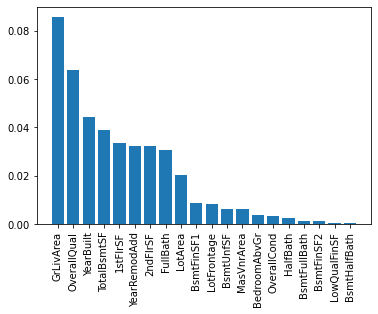

In [277]:
# Get feature importances
importances = rf_best.feature_importances_[:20]

# Sort in descending order
indices = np.argsort(importances)[::-1]

# Sort the labels in a corresponding fashion
labels = features.columns.values
names = [labels[i] for i in indices]

# Plot
plt.figure()
plt.bar(range(20),importances[indices])
plt.xticks(range(20), names, rotation=90)
plt.show()

In [ ]:
#Top 10 Most Important Features
#OverallQual 58%
#YearBuilt 42%
#LotArea 28%
#YearReModAdd
#BsmtFinSF1
#MasVnrArea
#BsmtUNfSF
#OverallCond
#BsmntFinSF2
